In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = pd.read_csv("data_csv\\2017_05_18.csv")
data = data[(20.87 < data.Lon) & (data.Lon < 21.15) & (52.16 < data.Lat) & (data.Lat < 52.34)]

In [3]:
data.head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,RUNNING,28,20.971098,28,2017-05-18T11:57:31,52.264481,False,11
1,RUNNING,22,21.084555,22,2017-05-18T11:57:32,52.244629,False,1
2,RUNNING,22,20.977781,22,2017-05-18T11:57:02,52.262615,False,8
3,RUNNING,4,21.012976,4,2017-05-18T11:57:31,52.311100,False,7
4,RUNNING,35,21.024283,35,2017-05-18T11:57:37,52.196407,False,8


In [4]:
data17 = data[data.FirstLine==17]

In [5]:
data17Lon = data17[np.abs(data17.Lon-data17.Lon.mean())<3*data17.Lon.std()]
data17LonLat = data17Lon[np.abs(data17Lon.Lat-data17Lon.Lat.mean())<3*data17Lon.Lat.std()]

In [6]:
data17LonLat.head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
79,RUNNING,17,21.004986,17,2017-05-18T11:57:40,52.220673,True,34
84,RUNNING,17,21.003632,17,2017-05-18T11:57:40,52.188686,True,32
97,RUNNING,17,21.007894,17,2017-05-18T11:57:39,52.208466,True,40
113,RUNNING,17,20.977528,"17,18",2017-05-18T11:57:40,52.265800,True,14
118,RUNNING,17,21.020071,"17,18",2017-05-18T11:57:39,52.266563,True,5


In [7]:
print(min(data17LonLat.Lon),max(data17LonLat.Lon))
print(min(data17LonLat.Lat),max(data17LonLat.Lat))

20.9340782 21.0245972
52.186821 52.3245163


In [8]:
interpolatedX = np.linspace(min(data17LonLat.Lon), max(data17LonLat.Lon), 250)
interpolatedY = np.interp(interpolatedX,data17LonLat.Lon,data17LonLat.Lat)

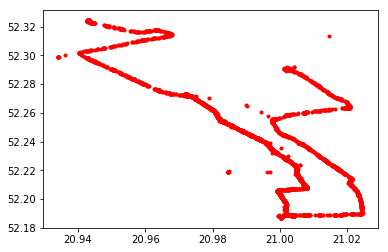

In [9]:
plt.plot( data17LonLat.Lon,data17LonLat.Lat, 'r.')
plt.show()

In [30]:
lines = data.FirstLine.unique().tolist()
lines.sort()

In [11]:
arrayWithData = list()
for line in lines:
    dataTemp = data[data.FirstLine==line]
    dataTempLon = dataTemp[np.abs(dataTemp.Lon-dataTemp.Lon.mean()) < 3*dataTemp.Lon.std()]
    dataTempLonLat = dataTempLon[np.abs(dataTempLon.Lat-dataTempLon.Lat.mean()) < 3*dataTempLon.Lat.std()]
    arrayWithData.append(dataTempLonLat)

In [12]:
arrayWithBrigades = list()
for line in arrayWithData:
    arrayWithBrigades.append(line.Brigade.unique())

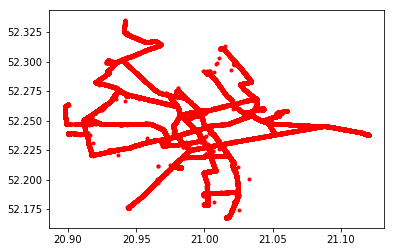

In [13]:
for oneLine in arrayWithData:
    plt.plot( oneLine.Lon,oneLine.Lat, 'r.')

plt.show()

In [14]:
brigade0line0=arrayWithData[0][arrayWithData[0].Brigade == arrayWithBrigades[0][0]]

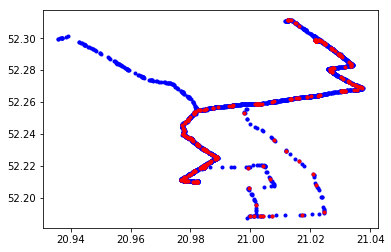

In [15]:
plt.plot(arrayWithData[0].Lon,arrayWithData[0].Lat,'b.')
plt.plot( brigade0line0.Lon,brigade0line0.Lat, 'r.')
plt.show()

In [16]:
class Budynek:
    def __init__(self,points,name,height):
        self.points = points
        self.name = name
        self.height = height
    def __repr__ (self):
        return ("%s" % self.name)

In [17]:
# http://www.ranker.com/list/warsaw-buildings-and-structures/reference
# http://warszawa.naszemiasto.pl/artykul/zdjecia/kino-iluzjon,3484354,galop,16824932,t,id,tm,zid.html
budynki = []
belweder = Budynek([(52.2134507,21.0270352),(52.213505, 21.027662),(52.212808, 21.027807),(52.212749, 21.027201)],"Belweder",20)
polin = Budynek([(52.250513, 20.993801),(52.249015, 20.995244),(52.248263, 20.991671),(52.248263, 20.991671)],"POLIN",20)
muzeum_narodowe = Budynek([(52.231957, 21.023139),(52.232440, 21.025939)],"muzeum narodowe",20)
stadion = Budynek([(52.239936, 21.043051),(52.241204, 21.046313),(52.238865, 21.048727),(52.237794, 21.045154)],"Stadion Narodowy",100)
palack_brnaickich = Budynek([(52.247273, 21.011434),(52.246616, 21.011756)],"Palac Branickich",10)
kosciol_karmelitan = Budynek([(52.243653, 21.015070),(52.243226, 21.015489),(52.243706, 21.016937),(52.244100, 21.016567)],"Kosciol Karmelitan",30)
kosciol_z_loreto = Budynek([(52.256728, 21.027157),(52.256629, 21.028295),(52.256931, 21.027694)],"Kosciol Matki Bozej Loretanskiej",20)
kosciol_zbawiciela = Budynek([(52.219443, 21.017953),(52.218989, 21.017919)],"Kosciol Zbawiciela",30)
palac_pod_blacha = Budynek([(52.247186, 21.016465),(52.247038, 21.015430)],"Palac pod blacha",30)
akademia_sztuk_pieknych = Budynek([(52.239114, 21.014792),(52.239249, 21.015499),(52.239676, 21.015209),(52.239614, 21.014662)],"Akademia Sztuk Pieknych",30)
kosciol_sw_trojcy = Budynek([(52.238519, 21.011504)],"Kosciol Sw Trojcy",20)
intercontinental = Budynek([(52.232474, 21.002064),(52.232255, 21.002855),(52.232143, 21.002340),(52.232577, 21.002726)],"Intercontinental",100)
sanktuarium_matki_bozej_laskawej = Budynek([(52.248889, 21.013144)],"sanktuarium_matki_bozej_laskawej",30)
palac_kazimierzowski = Budynek([(52.240876, 21.019828),(52.240314, 21.020166),(52.240452, 21.020740),(52.240987, 21.020289)],"Palac Kazimierzowski",20)
palack_krasinskich = Budynek([(52.249539, 21.003281),(52.248872, 21.004048),(52.249082, 21.004483),(52.249660, 21.003791)],"Palac Krasinskich",20)
krolikarnia = Budynek([(52.188995, 21.028308)],"Krolikarnia",20)
palac_mostkowskich = Budynek([(52.246012, 20.999398),(52.246945, 20.998465)],"palac mostkowskich",20)
palac_kultury = Budynek([(52.233842, 21.002691),(52.229045, 21.005674),(52.230064, 21.010631),(52.234959, 21.008399)],"Palac Kultury i Nauki",150)
palac_pod_czterema_wiatrami = Budynek([(52.247116, 21.004102)],"palac pod czterema wiatrami",10)
most_poniatowski = Budynek([(52.236406, 21.037507),(52.237194, 21.042807),(52.231664, 21.047626),(52.230941, 21.042562)],"Most Poniatowski",100)
palac_potockich = Budynek([(52.242445, 21.013874)],"Palac Potockich",20)
palac_prezydencki = Budynek([(52.242794, 21.015717)],"Palac prezydencki",20)
warsaw_spire = Budynek([(52.232191, 20.984362)],"Warsaw Spire",150)
prudential = Budynek([(52.235751, 21.012245),(52.235234, 21.012401),(52.235323, 21.013010),(52.235883, 21.012648)],"Prudential",80)
palac_krolewski = Budynek([(52.247263, 21.014125),(52.247381, 21.015722),(52.248471, 21.015346),(52.248185, 21.013994)],"Zamek krolewski",50)
palac_sapiechy=Budynek([(52.254322, 21.006735)],"Palac Sapiechy",20)
kolumna_zygmunta = Budynek([(52.247210, 21.013386)],"Kolumna Zygmunta III",50)
kosciol_sw_aleksandra = Budynek([(52.229028,21.0215386)],"Kościół św. Aleksandra",30)
kosciol_sw_anny = Budynek([(52.246359, 21.013825),(52.245581, 21.014211),(52.245729, 21.015193),(52.246425, 21.014828)],"Kosciol sw Anny",60)
kosciol_sw_basi = Budynek([(52.2264624,21.006351)],"Parafia rzymskokatolicka sw. Barbary",20)
kosciol_sw_kazimierza = Budynek([(52.253134, 21.008788)],"Kosciol Sakramentek pw. sw. Kazimierza",20)
kosciol_sw_marcina = Budynek([(52.248096, 21.012459)],"Kosciol sw Marcina",20)
stara_prochownia = Budynek([(52.251956, 21.012003)],"Stara prochowniak",20)
palac_staszica = Budynek([(52.237897, 21.017773),(52.237191, 21.017994),(52.237388, 21.019088),(52.238042, 21.018471)],"Palac Staszica",20)
teatr_wielki = Budynek([(52.243487, 21.008999),(52.242613, 21.010796),(52.243158, 21.011998),(52.244367, 21.011172)],"Teatr wielki",20)
palac_tyszkiewiczow = Budynek([(52.240727, 21.016403),(52.239856, 21.016954),(52.240066, 21.017941),(52.240986, 21.017367)],"Palac Tyszkiewiczow",30)
kosciol_wizytanek = Budynek([(52.2412304,21.0160895)],"Kosciol wizytanek",15)
warsaw_trade_tower = Budynek([(52.235380, 20.982433)],"Warsaw Trade Tower",150)
palac_wilanowski = Budynek([(52.166400, 21.085851),(52.164097, 21.086175),(52.163893, 21.092312),(52.166862, 21.091679)],"Palac Wilanowski",30)
biblioteka_zaluskich = Budynek([(52.245439, 21.007618)],"Biblioteka Zaluskich",20)
zlota_44 = Budynek([(52.231150, 21.002624)],"Zlota 44",150)
zlote_tarasy = Budynek([(52.230421, 21.000736),(52.229172, 21.001573),(52.229711, 21.004620),(52.231150, 21.003708)],"Zlote tarasy",40)
zacheta = Budynek([(52.2392172,21.0100963)],"Zacheta – Narodowa Galeria Sztuki",20)
cosmopolitan= Budynek([(52.235474, 21.001674)],"Cosmopolitan",150)
gmach_pw = Budynek([(52.220274, 21.010554),(52.220307, 21.009234),(52.221214, 21.009931)],"Gmach glowny politechniki Warszawskiej",30)
buw = Budynek([(52.2424626,21.0231545)],"Biblioteka UW",20)
bristol = Budynek([(52.242213, 21.015934)],"Hotel Bristol",20)


budynki.extend([belweder,polin,muzeum_narodowe,stadion,palack_brnaickich,kosciol_karmelitan,kosciol_z_loreto,kosciol_zbawiciela,palac_pod_blacha,akademia_sztuk_pieknych])
budynki.extend([kosciol_sw_trojcy,intercontinental,sanktuarium_matki_bozej_laskawej,palac_kazimierzowski])
budynki.extend([palack_krasinskich,krolikarnia,palac_mostkowskich,palac_kultury,palac_pod_czterema_wiatrami,most_poniatowski])
budynki.extend([palac_potockich,palac_prezydencki,warsaw_spire,prudential,palac_krolewski,palac_sapiechy,kolumna_zygmunta,kosciol_sw_aleksandra])
budynki.extend([kosciol_sw_anny,kosciol_sw_basi,kosciol_sw_kazimierza,kosciol_sw_marcina,stara_prochownia,palac_staszica])
budynki.extend([teatr_wielki,palac_tyszkiewiczow,kosciol_wizytanek,warsaw_trade_tower,palac_wilanowski,biblioteka_zaluskich])
budynki.extend([zlota_44,zlote_tarasy,zacheta,cosmopolitan,gmach_pw,buw,bristol])

In [18]:
budynki

[Belweder,
 POLIN,
 muzeum narodowe,
 Stadion Narodowy,
 Palac Branickich,
 Kosciol Karmelitan,
 Kosciol Matki Bozej Loretanskiej,
 Kosciol Zbawiciela,
 Palac pod blacha,
 Akademia Sztuk Pieknych,
 Kosciol Sw Trojcy,
 Intercontinental,
 sanktuarium_matki_bozej_laskawej,
 Palac Kazimierzowski,
 Palac Krasinskich,
 Krolikarnia,
 palac mostkowskich,
 Palac Kultury i Nauki,
 palac pod czterema wiatrami,
 Most Poniatowski,
 Palac Potockich,
 Palac prezydencki,
 Warsaw Spire,
 Prudential,
 Zamek krolewski,
 Palac Sapiechy,
 Kolumna Zygmunta III,
 Kościół św. Aleksandra,
 Kosciol sw Anny,
 Parafia rzymskokatolicka sw. Barbary,
 Kosciol Sakramentek pw. sw. Kazimierza,
 Kosciol sw Marcina,
 Stara prochowniak,
 Palac Staszica,
 Teatr wielki,
 Palac Tyszkiewiczow,
 Kosciol wizytanek,
 Warsaw Trade Tower,
 Palac Wilanowski,
 Biblioteka Zaluskich,
 Zlota 44,
 Zlote tarasy,
 Zacheta – Narodowa Galeria Sztuki,
 Cosmopolitan,
 Gmach glowny politechniki Warszawskiej,
 Biblioteka UW,
 Hotel Bristol]

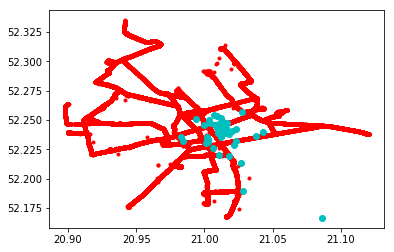

In [19]:
for oneLine in arrayWithData:
    plt.plot( oneLine.Lon,oneLine.Lat, 'r.')

for budynek in budynki:
    plt.plot(budynek.points[0][1],budynek.points[0][0],'co')

plt.show()

In [20]:
def CountDistance(lat1, lng1, lat2, lng2):
    earthRadius = 6371000.0;
    
    dLat = math.radians(lat2-lat1)
    dLng = math.radians(lng2-lng1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLng/2) * math.sin(dLng/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = (earthRadius * c)
    
    return dist 

In [62]:
def coorDiff(dist):
    mpd_lat = 111271.67312454112
    mpd_lon = 68325.95947109786
    return dist/mpd_lat, dist/mpd_lon

In [73]:
nearBuildings = {}
dist = 300
coorDelta = coorDiff(dist)
for oneLine in arrayWithData:
    pointsCounter = 0
    for budynek in budynki:
        visited = False
        for point in budynek.points:
            for index, position in oneLine.loc[(oneLine.Lat >= point[0] - coorDelta[0]) &\
                                              (oneLine.Lat <= point[0] + coorDelta[0]) &\
                                              (oneLine.Lon >= point[1] - coorDelta[1]) &\
                                              (oneLine.Lon <= point[1] + coorDelta[1])].iterrows():
                if CountDistance(position.Lat, position.Lon, point[0], point[1]) < dist:
                    visited = True
                    break
            if visited:
                break
        if visited:
            pointsCounter += 1
            continue
    nearBuildings[oneLine.iloc[0].FirstLine] = pointsCounter

In [74]:
nearBuildings

{1: 10,
 2: 0,
 3: 0,
 4: 20,
 6: 1,
 7: 7,
 9: 10,
 10: 11,
 11: 1,
 13: 12,
 14: 5,
 15: 9,
 17: 14,
 18: 13,
 20: 13,
 22: 18,
 23: 12,
 24: 10,
 25: 23,
 26: 13,
 27: 1,
 28: 3,
 31: 0,
 33: 8,
 35: 10,
 44: 3}